In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/D2-1'
#sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/D2-1/anndataNucD21_tangram') # reset original anndata

In [3]:
# UMAP for vizualization
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
n_neighb = 15
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15)
# Leiden Overclustering
sc.tl.leiden(anndata,resolution=10,key_added='leiden')
sc.pl.umap(anndata,color='leiden',palette=list(matplotlib.colors.XKCD_COLORS.values()))

In [4]:
anndata.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs', 'Cleanliness',
       'annotation', 'Hep', 'annotationSave', 'uniform_density',
       'rna_count_based_density', 'annotation_tangram', 'tangram_cleanliness'],
      dtype='ob

In [5]:
anndata.uns['tangram']

,Stel,Meso,LSEC,Portal vein,Hepa,Chol,Fibr,Central vein,Oth im,B cell,Kupf
cells,,,,,,,,,,,
65,0.256112,0.046421,0.791766,0.062242,0.227985,0.013491,0.015407,0.001127,0.000987,0.023013,0.000781
66,0.087394,0.037935,0.125710,0.000731,1.164645,0.004381,0.008729,0.003306,0.001411,0.000791,0.000948
67,0.036876,0.026428,0.003267,0.000663,1.354568,0.004467,0.008181,0.000979,0.000995,0.000641,0.000978
68,0.054461,0.123867,0.520662,0.000703,0.443628,0.187793,0.006821,0.000927,0.001026,0.000711,0.091307
69,0.052276,0.038849,0.364797,0.065646,0.868831,0.003994,0.017845,0.023966,0.001009,0.000817,0.000896
...,...,...,...,...,...,...,...,...,...,...,...
26526,0.005521,0.014875,0.002367,0.000548,1.394916,0.002601,0.006871,0.000628,0.001136,0.000638,0.006328
26589,0.033734,0.018300,0.002504,0.000535,1.360578,0.002797,0.004792,0.000537,0.001072,0.000640,0.000802
26776,0.041486,0.027546,0.132137,0.000971,0.540319,0.517763,0.076060,0.001355,0.092487,0.000751,0.000878


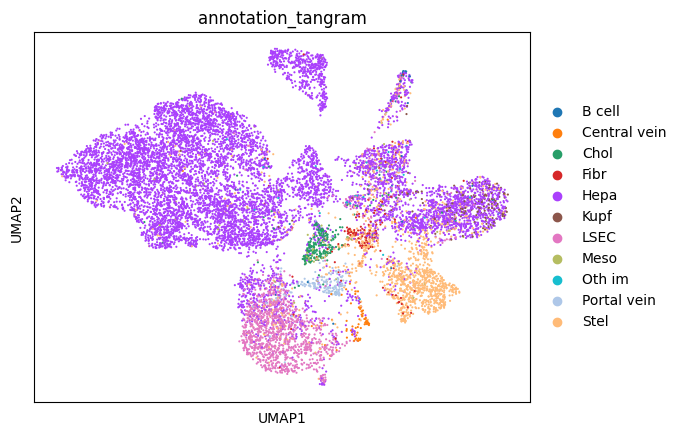

Cell type proportions:
              annotation_tangram
B cell                  0.287563
Central vein            0.662992
Chol                    2.060867
Fibr                    1.381900
Hepa                   70.301142
Kupf                    1.294033
LSEC                   10.567937
Meso                    0.647017
Oth im                  0.263599
Portal vein             1.557632
Stel                   10.975318


Leiden clusters
Only a cell type assigned to a Leiden cluster, if more than 50 percent of cells have the same cell type, otherwise 'Unknown':
LSEC
[(1, 0.66, 1354), (11, 0.63, 474)]
Hepa
[(0, 0.99, 1921), (2, 0.98, 1099), (3, 0.77, 1083), (4, 0.99, 1055), (5, 0.97, 1018), (7, 0.73, 674), (9, 0.98, 512), (10, 0.99, 477), (12, 0.9, 365), (14, 0.8, 335), (15, 0.63, 219)]
Stel
[(6, 0.92, 797)]
Portal vein
[(16, 0.7, 212)]
Chol
[(13, 0.62, 346)]
Kupf
[]
B cell
[]
Central vein
[]
Fibr
[]
Meso
[]
Oth im
[]
Unknown
[(8, 0.35, 578)]


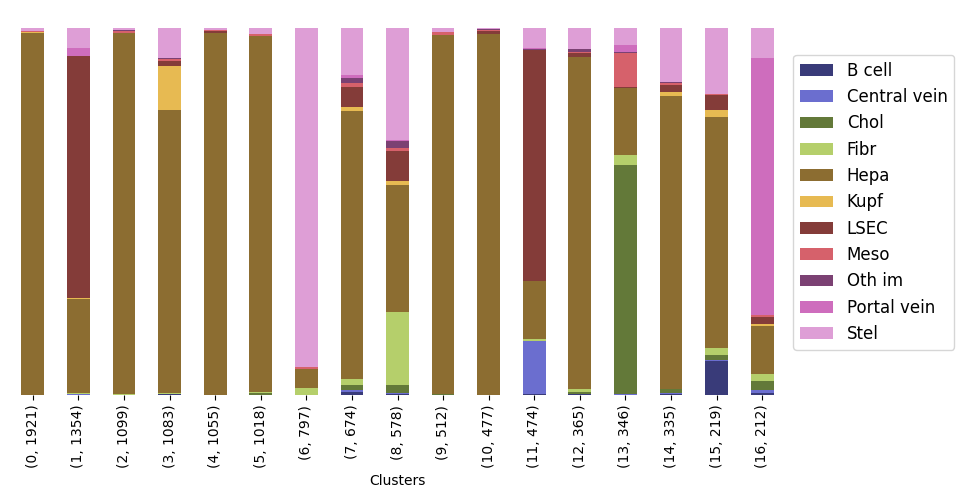

Fraction of cells in a Leiden cluster with unknown cell type:
4.617
Average cluster homogeneity:
0.801
Average cluster homogeneity per cell_type:
B cell: nan
Central vein: nan
Chol: 0.62
Fibr: nan
Hepa: 0.885
Kupf: nan
LSEC: 0.645
Meso: nan
Oth im: nan
Portal vein: 0.7
Stel: 0.92
Unknown: 0.35


Correlation between cell type scores:


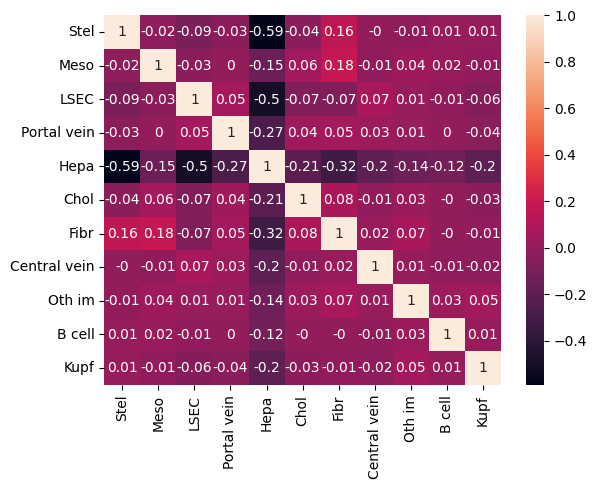

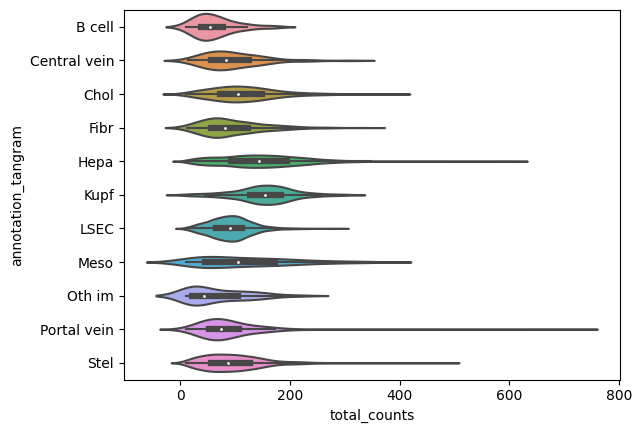

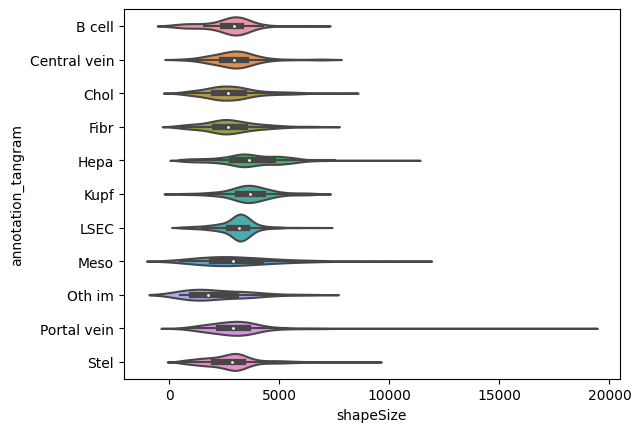

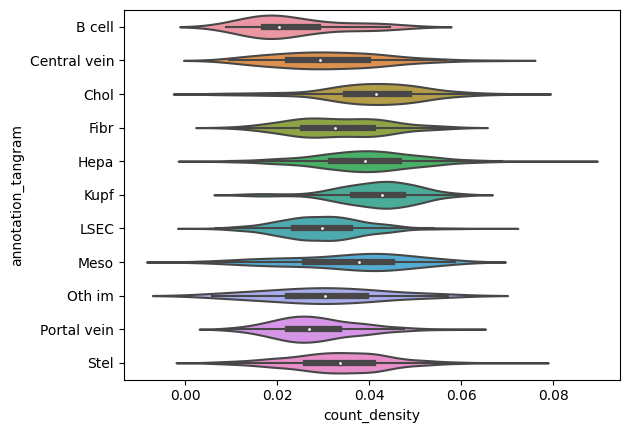

In [6]:
# Tangram cell mode
path_mg = ""
visualize_classification(anndata,'tangram','umap_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False)